**Analysis of Best Performing Types of Films**

**Overview**

The aim of this project is to analyse the performance of different types of films at the box office based on their financial performance and ratings. Sci-Fi movies generate the highest income with a domestic and foreign gross income of 1,076,088,000 USD and 170,365,600 USD respectively. Short films are well-received across the audiences with an averate rating of 8.8. Finally Romance, Drama and Documentary films are among the popular films.

**Business Problem**

The Micosoft new movie studio wants to understand what types of films to create. This project aims at analyzing how different types of films are performing at the box office. This will allow Microsoft to see the most successful films in terms of their ratings and financial performance.

**Data Understanding**

Three datasets from [Box Office Mojo ](https://www.boxofficemojo.com/) are used in this analysis: bom.movies_gross.csv.gz, imdb.title.basics.csv.gz, imdb.title.ratings.csv.gz

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import csv


In [3]:
#loading the gz files using gzip library and converting them to csv formart
#load movie_gross file
movie_gross_list = []
with gzip.open('Source Data/bom.movie_gross.csv.gz', mode = 'rt', encoding = 'utf-8') as f:
  read_with_csv = csv.reader(f)
#assigning a header
  header2 = next(read_with_csv)
#processing csv data
  for row in read_with_csv:
   movie_gross_list.append(row)

#loading title basics file
title_basics_list = []
with gzip.open('Source Data/imdb.title.basics.csv.gz', mode = 'rt', encoding = 'utf-8') as t:
  csv_read = csv.reader(t)
  #assignin header
  header1 = next(csv_read)
  for row in csv_read:
    title_basics_list.append(row)

#loading title ratings file
ratings_list = []
with gzip.open('Source Data/imdb.title.ratings.csv.gz', mode = 'rt', encoding = 'utf-8') as r:
  csv_read1 = csv.reader(r)
  header = next(csv_read1)
  for row in csv_read1:
    ratings_list.append(row)

**Exploring Movie Gross income, Title Basics and Title Ratings Data**

The data sets include records from [Box Office Mojo ](https://www.boxofficemojo.com/). They show the domestic and foreign gross incomes, genres, and average ratings of the films.

In [4]:
#creating a adata frame to store movie gross
movie_gross = pd.DataFrame(movie_gross_list, columns=header2)
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
#creating title basic data frame
title_basics = pd.DataFrame(title_basics_list, columns=header1)
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy"


In [11]:
#creating  titel ratings data frame
title_ratings = pd.DataFrame(ratings_list, columns = header)
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3000,31
1,tt10384606,8.9000,559
2,tt1042974,6.4000,20
3,tt1043726,4.2000,50352
4,tt1060240,6.5000,21


In [12]:
#Exploring the Shape in the data frames
print('Movies Gross', movie_gross.shape)
print('Title Basic', title_basics.shape)
print('Title ratings', title_ratings.shape)

Movies Gross (3387, 5)
Title Basic (146144, 6)
Title ratings (73856, 3)


In [13]:
#Data sets descriptive stats
print('Movies Gross')
print(movie_gross.describe())
print('Title Basics')
print(title_basics.describe())
print('Title Ratings')
print(title_ratings.describe())

Movies Gross
            title studio domestic_gross foreign_gross  year
count        3387   3387           3387          3387  3387
unique       3386    258           1798          1205     9
top     Bluebeard    IFC      1100000.0                2015
freq            2    166             32          1350   450
Title Basics
           tconst primary_title original_title start_year runtime_minutes  \
count      146144        146144         146144     146144          146144   
unique     146144        136071         137774         19             368   
top     tt0063540          Home                      2017                   
freq            1            24             21      17504           31739   

             genres  
count        146144  
unique         1086  
top     Documentary  
freq          32185  
Title Ratings
            tconst averagerating numvotes
count        73856         73856    73856
unique       73856            91     7349
top     tt10356526        7.0000      

**Data Preparation**

The aim of data preparation is to transform the data to a suitable format for analysis. This involves identifying and handling missing values, outliers, duplicate values, converting data into a constsitent formart and merging some data sets to a sinle file.

Missing Values

In [14]:
#define an advanced function to find missing values and their percentages
def missing_figures(data):
  missing = data.isnull().sum().sort_values(ascending = False)
  percentage_missing = (data.isnull().sum()/ len(data)).sort_values(ascending = False)

  missing_df = pd.DataFrame({'Missing values': missing, 'Percentage Missing': percentage_missing}).reset_index()

  return(missing_df)

In [15]:
#find missing values in movie_gross dataset
print(missing_figures(movie_gross))

            index  Missing values  Percentage Missing
0           title               0                 0.0
1          studio               0                 0.0
2  domestic_gross               0                 0.0
3   foreign_gross               0                 0.0
4            year               0                 0.0


In [16]:
#find missing values in title basics dataset
missing_figures(title_basics)

,index,Missing values,Percentage Missing
0,tconst,0,0.0
1,primary_title,0,0.0
2,original_title,0,0.0
3,start_year,0,0.0
4,runtime_minutes,0,0.0
5,genres,0,0.0


In [17]:
#finding missing values in title ratings
missing_figures(title_ratings)

,index,Missing values,Percentage Missing
0,tconst,0,0.0
1,averagerating,0,0.0
2,numvotes,0,0.0


Duplicate Entries

In [18]:
#Find duplicate values in the data sets
print('Movie Gross Duplicates:', movie_gross.duplicated().sum())
print('Title Basics Duplicates:', title_basics.duplicated().sum())
print('Title ratings Duplicates:', title_ratings.duplicated().sum())

Movie Gross Duplicates: 0
Title Basics Duplicates: 0
Title ratings Duplicates: 0


In [19]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3387 non-null   object
 2   domestic_gross  3387 non-null   object
 3   foreign_gross   3387 non-null   object
 4   year            3387 non-null   object
dtypes: object(5)
memory usage: 132.4+ KB


In [20]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   tconst           146144 non-null  object
 1   primary_title    146144 non-null  object
 2   original_title   146144 non-null  object
 3   start_year       146144 non-null  object
 4   runtime_minutes  146144 non-null  object
 5   genres           146144 non-null  object
dtypes: object(6)
memory usage: 6.7+ MB


In [21]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tconst         73856 non-null  object
 1   averagerating  73856 non-null  object
 2   numvotes       73856 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [22]:
#define a function to clean and change the data types
def change_type(data, cols, type):
  for col in cols:
    #remove period from numbers
    # data[col]=data[col].str.replace('.','', inplace = True, regex = True)
    #convert to desired type
    data[col]=data[col].astype(type)
  return data.dtypes

In [23]:
#change average rating and num votes in title ratings to float to float
change_type(title_ratings, ['averagerating', 'numvotes'], 'float')


tconst            object
averagerating    float64
numvotes         float64
dtype: object

In [24]:
#define another function to clean and change the data types
def clean_change_type(data, cols, type):
  for col in cols:
    #remove period from numbers
    data[col]=data[col].apply(lambda x: int(x.replace('.', '').replace(',','')) if x else 0).astype(type)

  return data.dtypes

In [25]:
#change domestic gross and foreign gross in movie gross to float to float
clean_change_type(movie_gross, ['domestic_gross', 'foreign_gross'], int)

title             object
studio            object
domestic_gross     int64
foreign_gross      int64
year              object
dtype: object

**Analysis**

In [26]:
title_basics.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [27]:
title_ratings.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [52]:
#merging title_basics and title_ratings columns
title_ratings2 = title_ratings.merge(title_basics, on = 'tconst', how = 'left')
title_ratings2.head()


,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019,117,Romance
1,tt10384606,8.9,559.0,Borderless,Borderless,2019,87,Documentary
2,tt1042974,6.4,20.0,Just Inès,Just Inès,2010,90,Drama
3,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014,99,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011,73,"Mystery,Thriller"


In [53]:
title_ratings2.shape

(73856, 8)

In [54]:
#splitting movies with multiple genres into separate entries
title_ratings2['genres'] = title_ratings2['genres'].str.split(",")
title_ratings_new = title_ratings2.explode('genres')
title_ratings_new.head(5)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019,117,Romance
1,tt10384606,8.9,559.0,Borderless,Borderless,2019,87,Documentary
2,tt1042974,6.4,20.0,Just Inès,Just Inès,2010,90,Drama
3,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014,99,Action
3,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014,99,Adventure


In [55]:
title_ratings_new.shape

(129294, 8)

**Distribution of Film Genres**

Romance movies are most watched followed by documentaries and drama films.

Text(0.5, 1.0, 'Movie Genres Distribution')

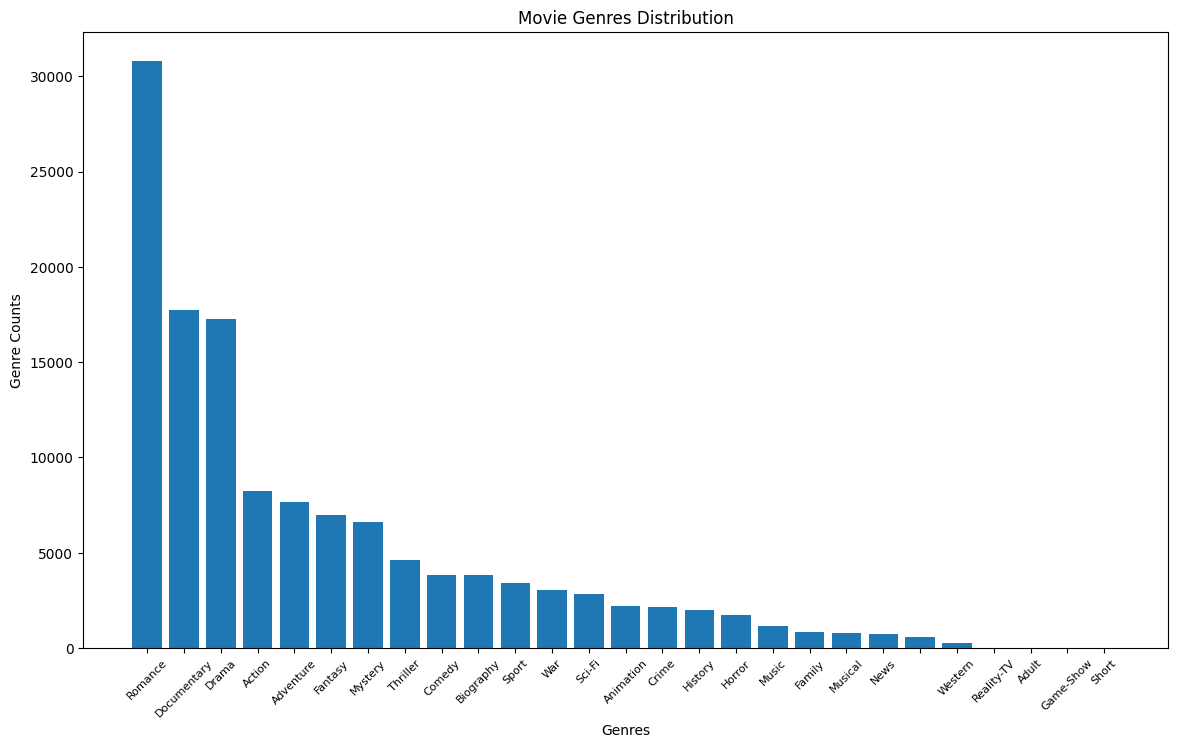

In [65]:
%matplotlib inline
x = title_ratings_new['genres'].unique()
y = title_ratings_new.genres.value_counts()
plt.figure(figsize=(14,8))
plt.bar(x,y)
plt.xticks(rotation = 45, fontsize = 8)
plt.xlabel('Genres')
plt.ylabel('Genre Counts')
plt.title('Movie Genres Distribution')

**Average Ratings according to Film Genres**

Short films are best are best rated because they convey a concise visual experience which leads to a higher likelihood to maintain quality in the story.

In [57]:
average_rating_by_genre = title_ratings_new.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
average_rating_by_genre

genres
Short          8.800000
Documentary    7.332090
Game-Show      7.300000
News           7.271330
Biography      7.162274
Music          7.091972
History        7.040956
Sport          6.961493
War            6.584291
Reality-TV     6.500000
Musical        6.498336
               6.496144
Drama          6.401559
Family         6.394725
Animation      6.248308
Adventure      6.196201
Romance        6.146608
Crime          6.115441
Comedy         6.002689
Mystery        5.920401
Fantasy        5.919473
Western        5.868214
Action         5.810361
Thriller       5.639114
Sci-Fi         5.489755
Horror         5.003440
Adult          3.766667
Name: averagerating, dtype: float64

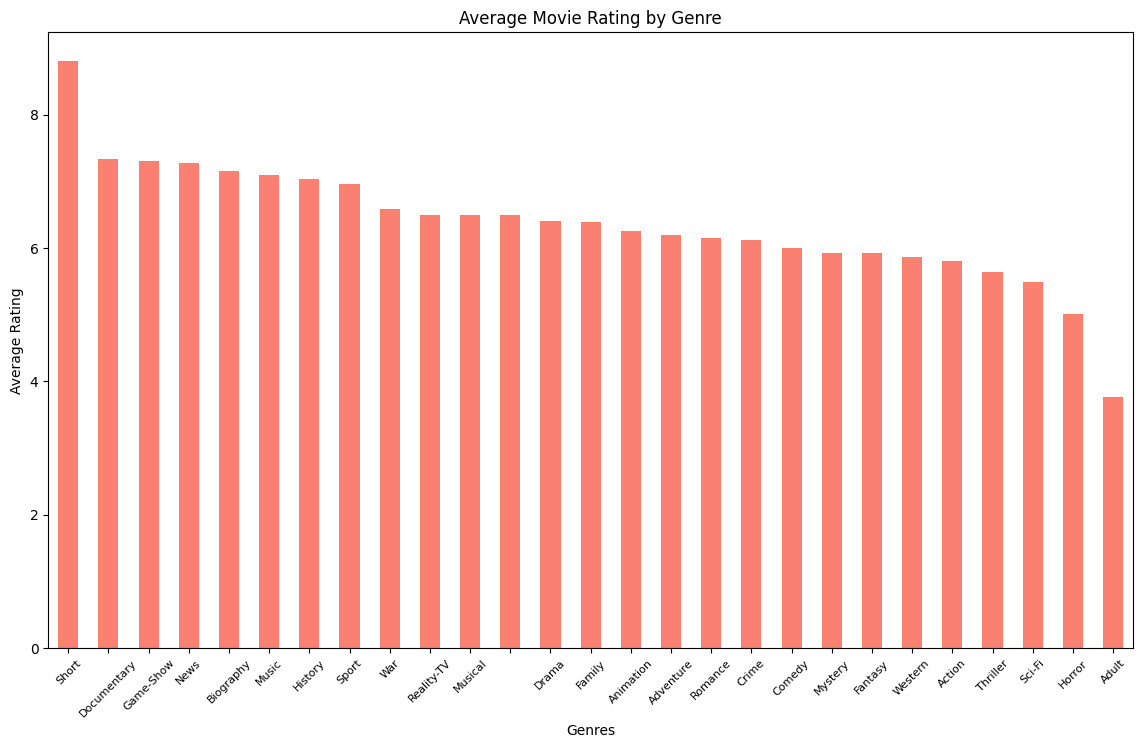

In [71]:
#Plot a bar graph to represent average movie rating by Genre
plt.figure(figsize=(14, 8))
average_rating_by_genre.plot(kind='bar', color = 'salmon')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating by Genre')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize = 8)
plt.show()


In [58]:
#find the average number of votes based on film genres
average_votes_by_genre = title_ratings_new.groupby('genres')['numvotes'].mean().sort_values(ascending = False)
average_votes_by_genre

genres
Adventure      22067.746660
Sci-Fi         19474.292384
Action         14476.485690
Fantasy        12387.443086
Animation       8808.549627
Western         8758.485714
Crime           8594.959011
Mystery         8113.618295
Thriller        5860.449434
Biography       5673.259648
Comedy          4297.617409
Romance         4084.667324
Drama           3883.574769
Sport           3185.601357
War             3147.391559
Horror          3112.417905
History         2776.406726
Music           2771.020833
Family          2531.274912
Musical         1925.055479
Game-Show       1734.500000
Documentary      266.960232
News             212.986183
Adult             54.666667
Reality-TV        27.000000
                  24.574627
Short              8.000000
Name: numvotes, dtype: float64

**Film Financial Perfomance**

Sci-Fi, Animation and Adventure generate the most domestic and foreign revenue because of their impressive visuals which most likely draw audiences. These types of films also exhibit a universal appeal that is not limites to any age, race, culture, and language; they draw a wider variety of audiences.

In [59]:
#merge the movie_gross data set with the title basis to categorise the film genres in the movie_gross dataset
movie_gross_new = movie_gross.merge(title_basics, left_on = 'title', right_on = 'primary_title', how = 'left')
movie_gross_new.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,4150000000,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103,"Adventure,Animation,Comedy"
1,Alice in Wonderland (2010),BV,3342000000,691300000,2010,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,2960000000,664300000,2010,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,2926000000,535700000,2010,tt1375666,Inception,Inception,2010,148,"Action,Adventure,Sci-Fi"
4,Shrek Forever After,P/DW,2387000000,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93,"Adventure,Animation,Comedy"


In [60]:
#splitting movies with multiple genres into separate entries
movie_gross_new['genres'] = movie_gross_new['genres'].str.split(",")
movie_gross_new1 = movie_gross_new.explode('genres')
movie_gross_new1.head(5)

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,4150000000,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103,Adventure
0,Toy Story 3,BV,4150000000,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103,Animation
0,Toy Story 3,BV,4150000000,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103,Comedy
1,Alice in Wonderland (2010),BV,3342000000,691300000,2010,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,2960000000,664300000,2010,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#Finding average domestic_gross income based on genres
domestic_gross= movie_gross_new1.groupby('genres')['domestic_gross'].mean().sort_values(ascending = False)
domestic_gross

genres
Sci-Fi         1.076088e+09
Adventure      9.398605e+08
Animation      8.676997e+08
Action         5.789028e+08
Fantasy        5.247895e+08
Family         4.339037e+08
               4.315910e+08
Sport          3.723851e+08
Comedy         3.367678e+08
Musical        2.899244e+08
Thriller       2.854054e+08
Horror         2.715969e+08
Western        2.406744e+08
Crime          2.398088e+08
Mystery        2.250844e+08
Biography      2.098164e+08
History        1.975284e+08
Music          1.731819e+08
Drama          1.655201e+08
Documentary    1.629734e+08
Romance        1.517973e+08
War            5.309440e+07
News           3.640900e+07
Name: domestic_gross, dtype: float64

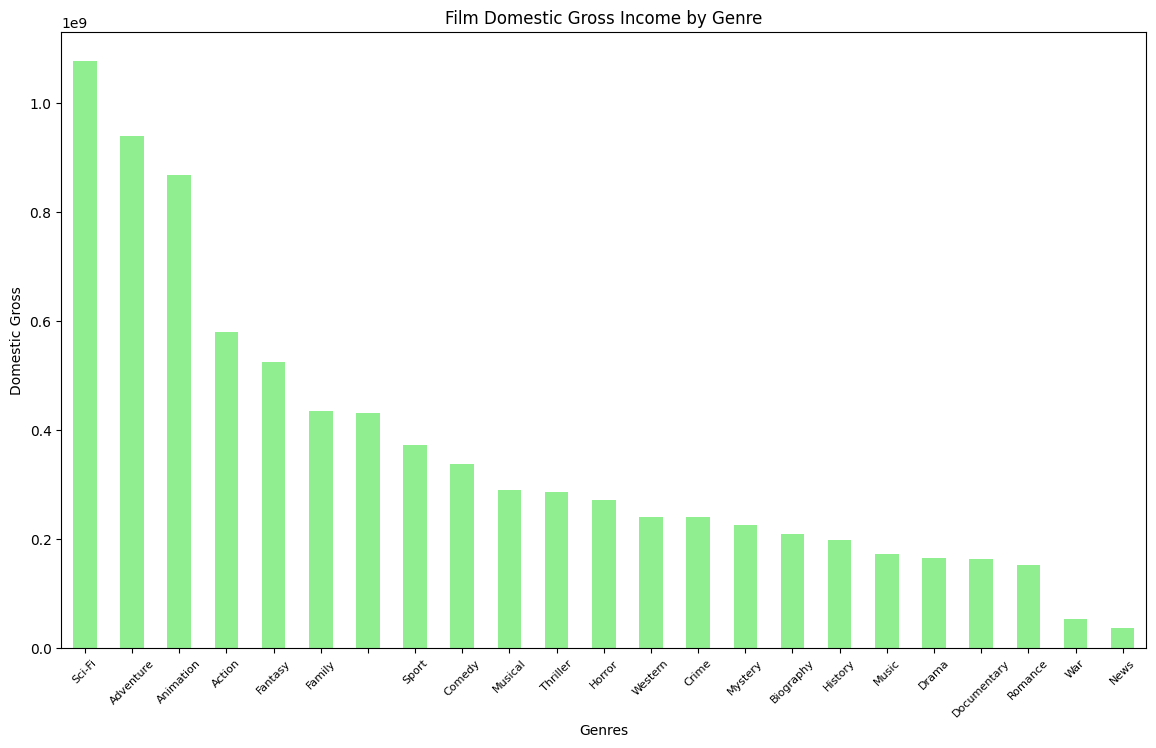

In [76]:
#Plot a bar graph to represent domestic gross income by Genre
plt.figure(figsize=(14, 8))
domestic_gross.plot(kind='bar', color = 'lightgreen')
plt.xlabel('Genres')
plt.ylabel('Domestic Gross')
plt.title('Film Domestic Gross Income by Genre')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize = 8)
plt.show()

In [62]:
#Finding average domestic_gross income based on genres
foreign_gross= movie_gross_new1.groupby('genres')['foreign_gross'].mean().sort_values(ascending = False)
foreign_gross

genres
Adventure      1.749988e+08
Sci-Fi         1.703656e+08
Animation      1.647804e+08
Fantasy        1.051523e+08
Action         1.039220e+08
               6.721472e+07
Family         6.480185e+07
Comedy         4.807488e+07
Thriller       4.556121e+07
Sport          4.067724e+07
Musical        3.900975e+07
Horror         3.544594e+07
Mystery        3.279308e+07
Western        3.190105e+07
Crime          2.596760e+07
History        2.511712e+07
Biography      2.494553e+07
Drama          2.272335e+07
Music          2.236260e+07
Romance        1.917571e+07
Documentary    1.826174e+07
War            1.100030e+07
News           8.000000e+06
Name: foreign_gross, dtype: float64

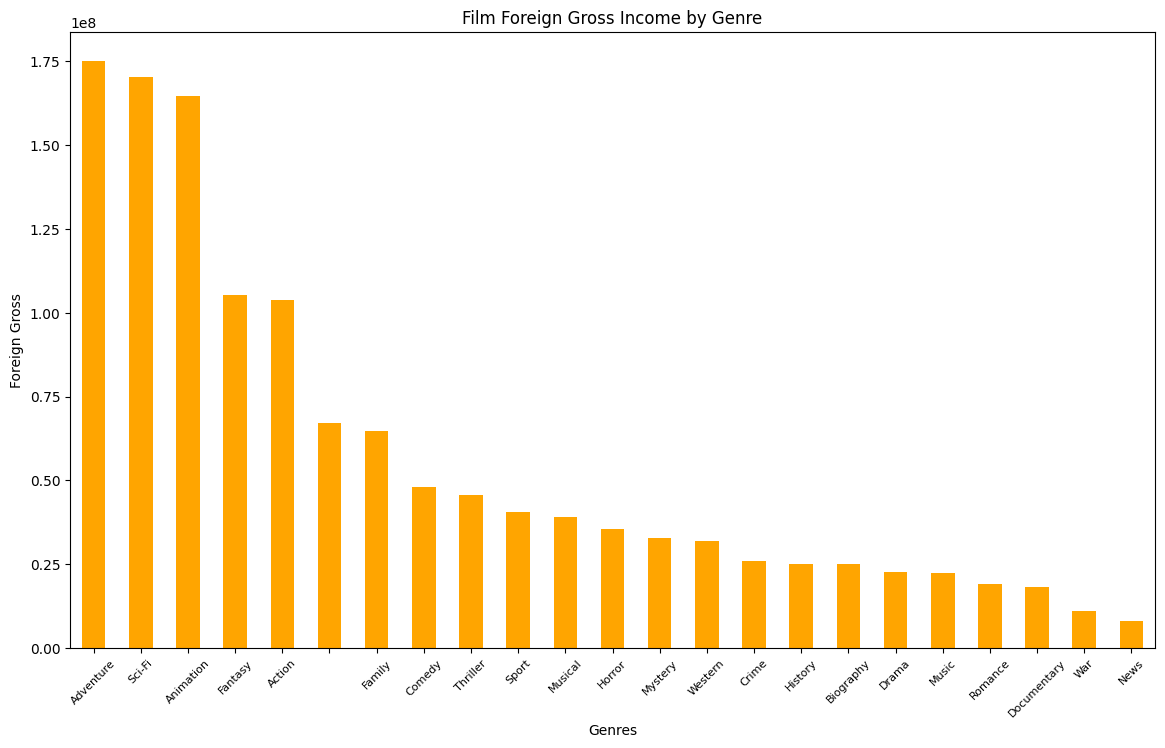

In [77]:
#Plot a bar graph to represent foreigh gross income by Genre
plt.figure(figsize=(14, 8))
foreign_gross.plot(kind='bar', color = 'orange')
plt.xlabel('Genres')
plt.ylabel('Foreign Gross')
plt.title('Film Foreign Gross Income by Genre')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize = 8)
plt.show()

**Conclusion**

This analysis established three important findings:

**Genres with high income potential.** Science Fiction, adventure, and animationa films generate the most income at the box office.

**Short films are best-received.** Microsoft could persue the production of short films as they have the highest averaging rating. This shows that the audience appreciates them the most.

**Most watched type of films.** Romance, documentary and drama films are the most popular films. The Microsoft studio can focus on producing movies in these genres to build a large viewer base.

**Recommendations**

**Take advantage of popular genres.**Microsoft should create more romance, drama, and documentary films to cover the wide viewership and estabdlish a strong presence in the market.

**Invest in short movie production.** The analysis shows that short films are best rated by the viewers. Microsoft should actively invest in producing this kind of films to ensure better recognision of their brand.

**Divesify on movie production.** Microsoft studio should allocate sufficient resources to make high quality content across all genres to attract a broader audience. More focus should be placed on creating Sci-Fi, animation, and adventure films as they have the potential to generate the highest income both locally and globally.